# Análise do Portfolio de Fundos

### Inicializações

In [1]:
import pandas as pd
import numpy as np

from datetime import datetime,timedelta
import math
import matplotlib.pyplot as plt
import seaborn as sn
sn.set_style("whitegrid")


In [2]:
#Get the Exchange Rates
exchange_rates_csv = 'exchange_rates.csv'
exchange_rates = pd.read_csv(exchange_rates_csv ,sep=';',parse_dates=[0])
exchange_rates['Date'] = exchange_rates['Date'].apply(lambda x: x.date())
exchange_rates = exchange_rates.set_index('Date')
exchange_rates.head()

,USD2EUR
Date,
2024-05-18,0.91917
2024-05-17,0.91915
2024-05-16,0.92013
2024-05-15,0.91828
2024-05-14,0.92446


In [3]:
#Get the Portofolio
portfolio_csv = 'portofolio.csv'
df_portofolio = pd.read_csv(portfolio_csv ,sep=';').set_index('Code')
code2name_dict = {x[0]:x[1] for x in df_portofolio.itertuples()}
df_portofolio.sort_values(by="Nome", axis=0)

,Nome,Moeda,Quantidade
Code,,,
LU1124235240,Aberdeen Diversified Income,EUR,903.76000
LU1890834598,Allianz Global Water,EUR,81.00500
LU0823433858,BNP Paribas Funds Turkey,EUR,38.04900
IE00B432GG85,BNY Mell Glb Dyn Bond A,EUR,3609.77000
LU1508158513,BlackRock Asia Pacific,EUR,171.55000
LU2210151697,FF Abs Ret Gb Eq,USD,3301.37000
LU2207571022,FF Absolute Return Global Hedged,EUR,1886.04000
LU0594300096,Fidelity China Consumer,EUR,735.19000
LU0788144201,Fidelity China RMB Bond,EUR,242.77000


In [4]:
#Get the historical quotes 

xls = 'historico_cotacoes.xlsx'
dict_df = pd.read_excel(xls,sheet_name=None)

# Parse the date and set it as index
for key in dict_df.keys():
    dict_df[key]['Date'] = dict_df[key].apply(lambda x: pd.to_datetime(x['Date']).date(), axis=1)
    dict_df[key].set_index('Date',drop=True, inplace=True)

# Create the DataFrame from the Dictionary of Dataframes, removing rows with null values
df_all = pd.concat([dict_df[f_name][['Close']].rename(columns={'Close':f_name}) for f_name in dict_df.keys()],axis=1).sort_index(ascending=False)
df_all

,LU0122613903,LU0705071453,LU0235843108,LU0122614463,LU0132636399,LU0252500524,LU1508158513,LU1799936197,IE00B432GG85,IE00BD3B6K23,...,IE00BLP5S353,LU1038809395,LU1308313201,LU2047632166,LU2210151697,LU0067412154,LU0982776501,LU0115764192,LU0594300096,LU1890834598
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-17,13.93,NaN,146.31,11.00,NaN,109.38,139.91,NaN,1.35,NaN,...,1.57,172.61,NaN,11.22,12.74,1166.52,NaN,47.24,18.71,184.53
2024-05-16,13.81,153.77,146.46,10.99,106.28,109.36,139.97,115.18,1.35,97.50,...,1.58,172.65,167.54,11.24,12.71,1146.01,NaN,47.31,18.33,186.07
2024-05-15,13.73,154.12,146.36,10.99,106.27,109.35,139.89,115.20,1.35,97.60,...,1.58,171.98,167.69,11.22,12.74,NaN,16.38,47.26,17.98,185.01
2024-05-14,13.72,154.45,146.47,10.99,106.27,109.34,139.78,115.28,1.35,97.93,...,1.58,172.06,166.73,11.21,12.65,1126.47,16.20,46.99,18.00,185.17
2024-05-13,13.66,155.07,146.54,10.99,106.26,109.33,139.43,115.20,1.35,97.91,...,1.58,172.55,166.06,11.22,12.69,1128.08,16.08,46.85,18.27,186.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-02,28.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-01,28.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-30,27.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Create a DataFrame starting from the furthest Date where all Funds have a valid amount, and replace a NaN with the last value known
df = df_all.loc[:df_all.index.min()].bfill().dropna()

#Create a DataFrame with the daily growth
df_grow = df.apply(lambda x: x/x.shift(-1), axis=0)
df

,LU0122613903,LU0705071453,LU0235843108,LU0122614463,LU0132636399,LU0252500524,LU1508158513,LU1799936197,IE00B432GG85,IE00BD3B6K23,...,IE00BLP5S353,LU1038809395,LU1308313201,LU2047632166,LU2210151697,LU0067412154,LU0982776501,LU0115764192,LU0594300096,LU1890834598
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-17,13.93,153.77,146.31,11.00,106.28,109.38,139.91,115.18,1.35,97.50,...,1.57,172.61,167.54,11.22,12.74,1166.52,16.38,47.24,18.71,184.53
2024-05-16,13.81,153.77,146.46,10.99,106.28,109.36,139.97,115.18,1.35,97.50,...,1.58,172.65,167.54,11.24,12.71,1146.01,16.38,47.31,18.33,186.07
2024-05-15,13.73,154.12,146.36,10.99,106.27,109.35,139.89,115.20,1.35,97.60,...,1.58,171.98,167.69,11.22,12.74,1126.47,16.38,47.26,17.98,185.01
2024-05-14,13.72,154.45,146.47,10.99,106.27,109.34,139.78,115.28,1.35,97.93,...,1.58,172.06,166.73,11.21,12.65,1126.47,16.20,46.99,18.00,185.17
2024-05-13,13.66,155.07,146.54,10.99,106.26,109.33,139.43,115.20,1.35,97.91,...,1.58,172.55,166.06,11.22,12.69,1128.08,16.08,46.85,18.27,186.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-23,8.92,138.63,150.30,10.55,101.33,106.05,119.60,108.21,1.32,106.20,...,1.42,159.18,145.64,10.75,11.18,1166.98,13.55,41.46,19.03,153.51
2023-05-22,8.92,138.75,150.10,10.55,101.33,106.04,119.21,108.23,1.31,106.22,...,1.42,159.07,146.03,10.73,11.19,1172.28,13.57,41.47,19.26,153.81
2023-05-19,8.92,138.63,149.90,10.55,101.31,106.02,119.31,108.16,1.32,106.09,...,1.42,158.71,145.81,10.73,11.19,1165.84,13.48,41.52,18.92,154.36


In [6]:
# Calculate the Portofolio Std and Growth
df_portofolio['STD'] = df_grow.std(axis=0)
df_portofolio['Growth'] = df.apply(lambda x: x.iloc[0]/x.iloc[-1]-1)
df_portofolio['Racio'] = df_portofolio['Growth']/df_portofolio['STD']

In [7]:
# Get the Current Total Amount in EUR

last_date = min(df.index[0],exchange_rates.index[0])
# Get the exchange rate for the last date of the historical quotes
usd2eur = exchange_rates.loc[last_date].iloc[0]
# Get the last Quotes
quotes = df_all.bfill().iloc[0]

df_portofolio['Amount EUR'] = df_portofolio['Moeda'].apply(lambda x: usd2eur if x == 'USD' else 1) * quotes * df_portofolio['Quantidade']

sum(df_portofolio['Amount EUR'])

346871.4299221811

c:\MyPrograms\miniconda3\envs\fundos\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\MyPrograms\miniconda3\envs\fundos\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


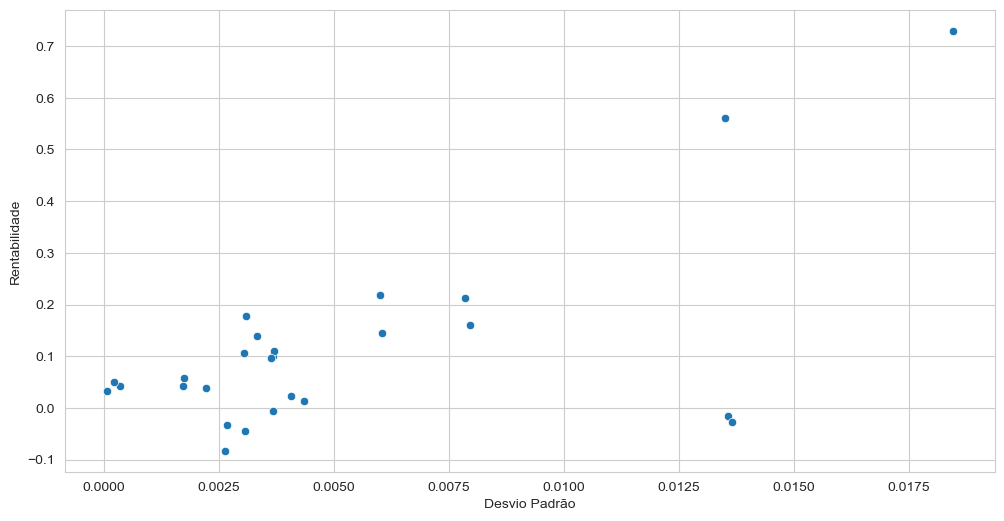

In [8]:
plt.figure(figsize=(12,6))
plt.xlabel('Desvio Padrão')
plt.ylabel('Rentabilidade')
p = sn.scatterplot(x=df_portofolio['STD'],y=df_portofolio['Growth'])

In [9]:
df_portofolio.sort_values(by=['Nome'],ascending=True)

,Nome,Moeda,Quantidade,STD,Growth,Racio,Amount EUR
Code,,,,,,,
LU1124235240,Aberdeen Diversified Income,EUR,903.76000,0.004342,0.012712,2.927799,8639.945600
LU1890834598,Allianz Global Water,EUR,81.00500,0.007860,0.212976,27.096465,14947.852650
LU0823433858,BNP Paribas Funds Turkey,EUR,38.04900,0.018454,0.729751,39.544821,10888.482330
IE00B432GG85,BNY Mell Glb Dyn Bond A,EUR,3609.77000,0.004058,0.022727,5.600532,4873.189500
LU1508158513,BlackRock Asia Pacific,EUR,171.55000,0.003090,0.177099,57.304907,24001.560500
LU2210151697,FF Abs Ret Gb Eq,USD,3301.37000,0.003337,0.139535,41.810996,38658.946960
LU2207571022,FF Absolute Return Global Hedged,EUR,1886.04000,0.001709,0.042399,24.804585,19011.283200
LU0594300096,Fidelity China Consumer,EUR,735.19000,0.013651,-0.026535,-1.943823,13755.404900
LU0788144201,Fidelity China RMB Bond,EUR,242.77000,0.003667,-0.006777,-1.848277,3202.136300


In [10]:
df_portofolio['Amount EUR'].sum()

346871.4299221811

In [11]:
df_portofolio = df_portofolio[df_portofolio.index != "LU0122613903"]

<Figure size 1200x800 with 0 Axes>

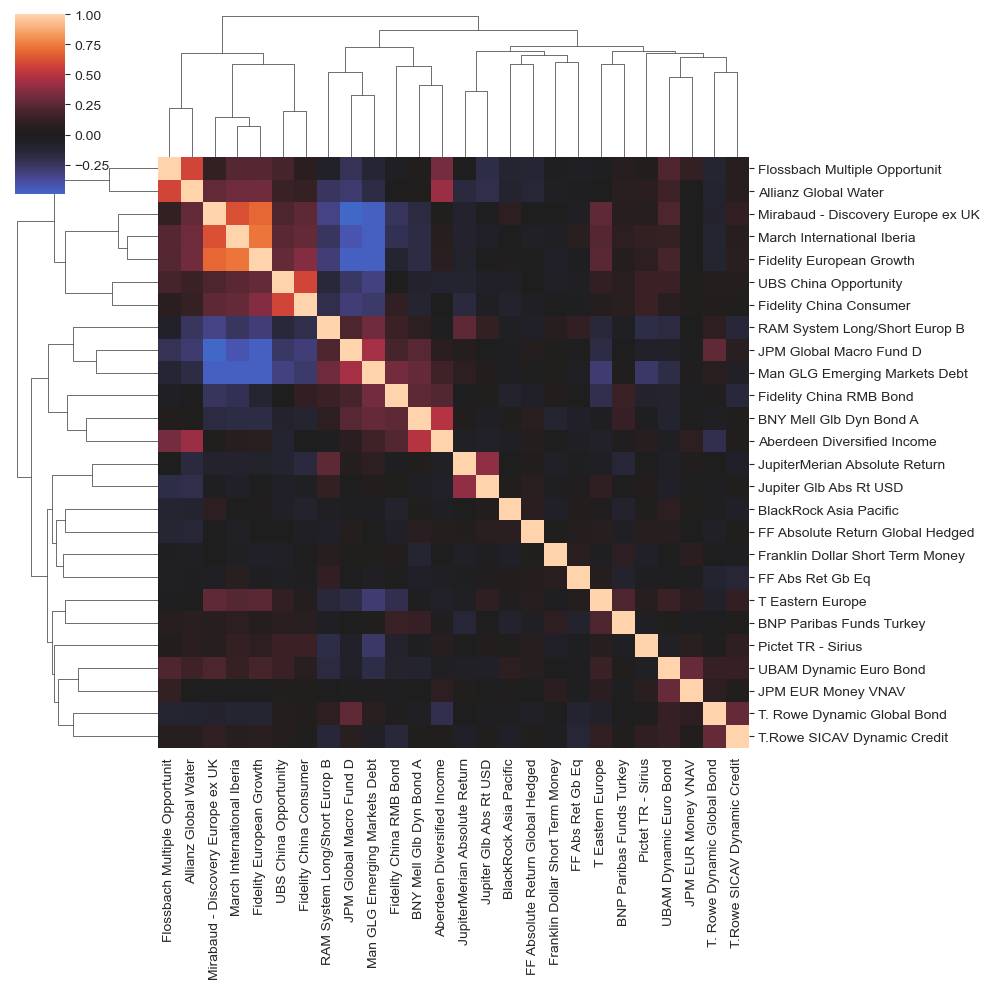

In [12]:
plt.figure(figsize=(12,8))
sn.clustermap(df_grow.rename(columns=code2name_dict).corr(),center=0)
#df_grow.corr()

In [13]:
##### Performance in the last days
df_portofolio_tmp = df_portofolio.copy()
start =66
finish = 0
print('Start Date:',df_all.index[start])
df_portofolio_tmp['Growth'] = df_all.bfill().ffill().apply(lambda x: x.iloc[finish]/x.iloc[start]-1)
df_portofolio_tmp['Racio'] = df_portofolio_tmp['Growth']/df_portofolio_tmp['STD']
# Save Portfoloio
# df_portofolio_tmp.sort_values(by=['Racio'],ascending=False).to_csv("portfolio_data.csv",sep=",")
# Show Portfolio
df_portofolio_tmp.sort_values(by=['Growth'],ascending=False)

Start Date: 2024-02-15


,Nome,Moeda,Quantidade,STD,Growth,Racio,Amount EUR
Code,,,,,,,
LU0067412154,UBS China Opportunity,USD,8.92000,0.013569,0.193298,14.245489,9564.085173
LU0982776501,March International Iberia,EUR,223.98160,0.006003,0.158416,26.389731,3668.818608
LU0594300096,Fidelity China Consumer,EUR,735.19000,0.013651,0.157797,11.559494,13755.404900
LU0823433858,BNP Paribas Funds Turkey,EUR,38.04900,0.018454,0.151358,8.202004,10888.482330
LU0115764192,Fidelity European Growth,EUR,311.95000,0.006052,0.097329,16.081036,14736.518000
LU1308313201,Mirabaud - Discovery Europe ex UK,EUR,87.45200,0.007969,0.094746,11.889018,14651.708080
LU1890834598,Allianz Global Water,EUR,81.00500,0.007860,0.079375,10.098755,14947.852650
LU2210151697,FF Abs Ret Gb Eq,USD,3301.37000,0.003337,0.052893,15.849017,38658.946960
LU1508158513,BlackRock Asia Pacific,EUR,171.55000,0.003090,0.045275,14.649732,24001.560500


Start Date: 2024-02-15


<Axes: xlabel='Date'>

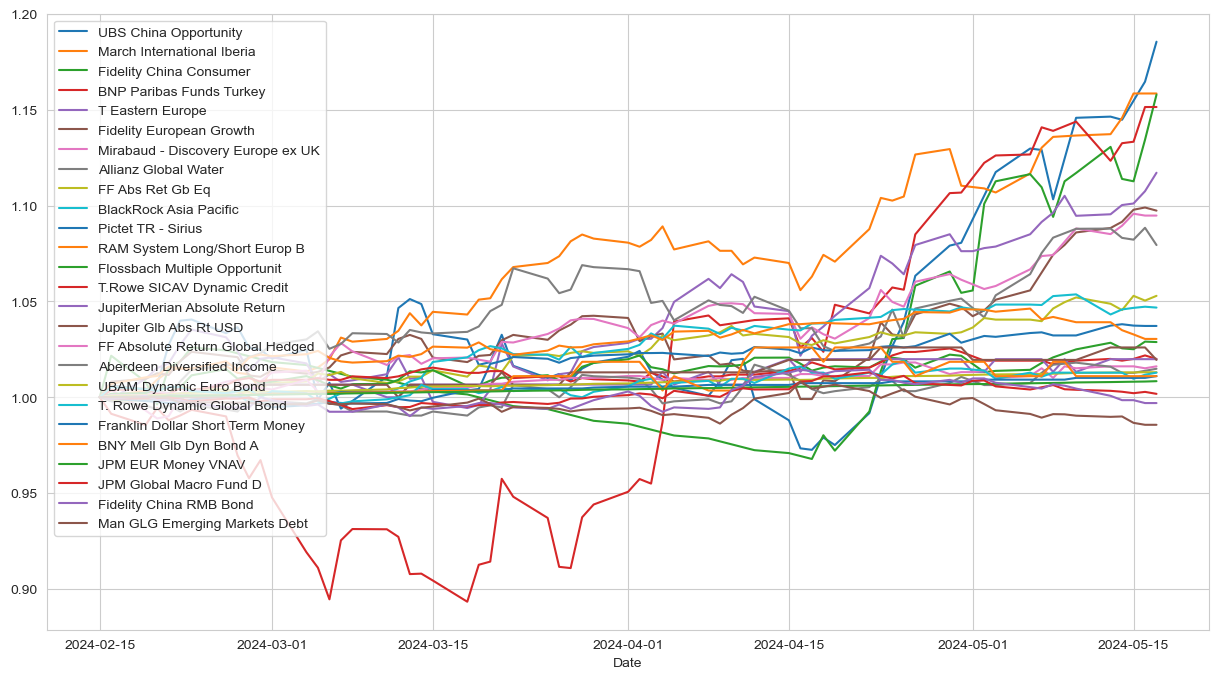

In [14]:
# Select Funds
fund_filter = df_all.columns
#fund_filter = []

print('Start Date:',df_all.index[start])
df_all_tmp = df_all.interpolate().bfill().ffill().apply(lambda x: x/x.iloc[start], axis=0)[fund_filter]
df_all_tmp = df_all_tmp.sort_values(by=df_all_tmp.index[finish],axis=1,ascending=False).rename(columns=code2name_dict)
ax = df_all_tmp.iloc[finish:start+1].plot(figsize=(15,8),grid=True)
ax.legend(loc='upper left')
ax

In [15]:
##### Performance in the last days
df_portofolio_tmp = df_portofolio.copy()
start =15
finish = 0
print('Start Date:',df_all.index[start])
df_portofolio_tmp['Growth'] = df_all.bfill().ffill().apply(lambda x: x.iloc[finish]/x.iloc[start]-1)
df_portofolio_tmp['Racio'] = df_portofolio_tmp['Growth']/df_portofolio_tmp['STD']
# Save Portfoloio
# df_portofolio_tmp.sort_values(by=['Nome'],ascending=True)
df_portofolio_tmp.sort_values(by=['Racio'],ascending=False) #.to_csv("portfolio_data.csv",sep=",")


Start Date: 2024-04-26


,Nome,Moeda,Quantidade,STD,Growth,Racio,Amount EUR
Code,,,,,,,
LU0252500524,JPM EUR Money VNAV,EUR,128.63900,0.000066,0.001924,29.038154,14070.533820
LU0132636399,UBAM Dynamic Euro Bond,EUR,215.95500,0.000217,0.001980,9.132761,22951.697400
LU0115764192,Fidelity European Growth,EUR,311.95000,0.006052,0.051882,8.572076,14736.518000
LU0067412154,UBS China Opportunity,USD,8.92000,0.013569,0.114804,8.460749,9564.085173
LU0122614463,Franklin Dollar Short Term Money,USD,1653.26000,0.000352,0.002735,7.768551,16715.533219
LU0594300096,Fidelity China Consumer,EUR,735.19000,0.013651,0.094152,6.897152,13755.404900
LU1799936197,Pictet TR - Sirius,USD,162.12413,0.001729,0.010262,5.935631,17163.708271
LU2210151697,FF Abs Ret Gb Eq,USD,3301.37000,0.003337,0.018385,5.509069,38658.946960
LU0982776501,March International Iberia,EUR,223.98160,0.006003,0.028249,4.705796,3668.818608


Start Date: 2024-04-26


<Axes: xlabel='Date'>

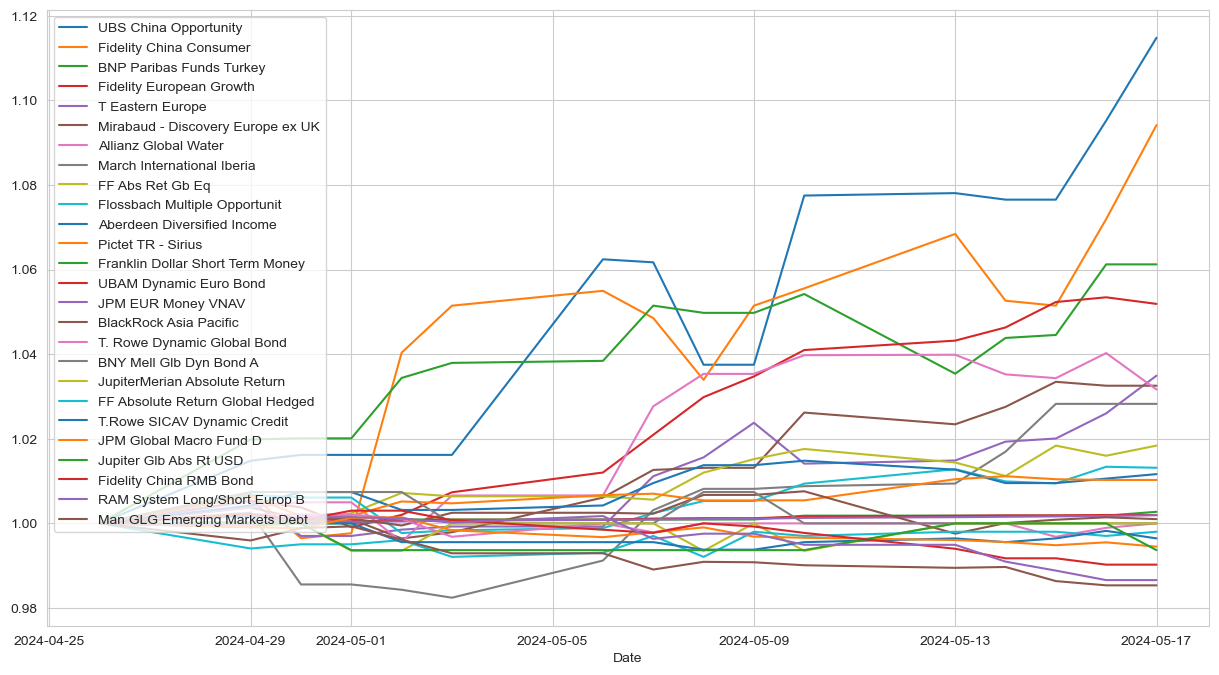

In [16]:

print('Start Date:',df_all.index[start])
df_all_tmp = df_all.bfill().apply(lambda x: x/x.iloc[start], axis=0)
df_all_tmp = df_all_tmp.sort_values(by=df_all_tmp.index[finish],axis=1,ascending=False).rename(columns=code2name_dict)
ax = df_all_tmp.iloc[finish:start+1].plot(figsize=(15,8),grid=True)
ax.legend(loc='upper left')
ax

In [17]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.efficient_frontier import EfficientFrontier

if 'LU0122613903' in dict_df:
    del dict_df['LU0122613903']

# Create the DataFrame from the Dictionary of Dataframes, removing rows with null values
df_all = pd.concat([dict_df[f_name][['Close']].rename(columns={'Close':f_name}) for f_name in dict_df.keys()],axis=1).sort_index(ascending=False)
df = df_all #.dropna()

# print(df.index)

mu = mean_historical_return(df.sort_index())
S = CovarianceShrinkage(df).ledoit_wolf()
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
df_mu = pd.DataFrame(data = {'Name':df_portofolio['Nome'],'all':list(mu)}, index=list(mu.keys()))
df_w = pd.DataFrame(data = {'Name':df_portofolio['Nome'] ,'all':list(cleaned_weights.values())}, index=list(cleaned_weights.keys()))
df_pp = pd.DataFrame(data = {'all':list(ef.portfolio_performance())}, index=list(['anual return','volatility','sharpe ratio']))
mu_coef = {'all':0.3,90:0.3,5:0.15,10:0.15,30:0.10}
mu_w = mu_coef['all']*mu
for n in mu_coef.keys()-['all']:
    mu = mean_historical_return(df[:n].sort_index())
    
    ef = EfficientFrontier(mu, S)
    weights = ef.max_sharpe()
    cleaned_weights = ef.clean_weights()
    if n == 60:
        mu_w += 0.30*mu
    else:
        mu_w += 0.175*mu
    df_mu[n] = list(mu)
    df_w[n] = list(cleaned_weights.values())
    df_pp[n] = list(ef.portfolio_performance())
    

ef = EfficientFrontier(mu_w, S)
weights = ef.max_sharpe()

df_w['Avg'] = list(ef.clean_weights().values())
df_w['Now'] = df_portofolio_tmp['Amount EUR']/df_portofolio_tmp['Amount EUR'].sum()
df_pp['Avg'] = list(ef.portfolio_performance())
df_mu['Avg'] = list(mu_w)
df_mu.sort_values(by="Avg",ascending=False)

c:\MyPrograms\miniconda3\envs\fundos\Lib\site-packages\pypfopt\expected_returns.py:56: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  returns = prices.pct_change().dropna(how="all")
c:\MyPrograms\miniconda3\envs\fundos\Lib\site-packages\pypfopt\expected_returns.py:56: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  returns = prices.pct_change().dropna(how="all")
c:\MyPrograms\miniconda3\envs\fundos\Lib\site-packages\pypfopt\expected_returns.py:56: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warnin

,Name,all,10,5,90,30,Avg
LU0067412154,UBS China Opportunity,-0.047049,2.847857e+00,7.256467e+00,0.573179,3.355854,2.441723
LU0594300096,Fidelity China Consumer,-0.078032,1.776151e+00,3.478372e+00,0.576886,6.790905,2.185495
LU0823433858,BNP Paribas Funds Turkey,0.728172,8.373059e-01,3.727673e+00,1.063538,1.367492,1.442753
LU0982776501,March International Iberia,0.208675,1.793119e+00,2.204459e+00,0.486496,0.819183,0.990673
LU0115764192,Fidelity European Growth,0.140980,1.949362e+00,6.858483e-01,0.315459,0.857789,0.708774
LU1308313201,Mirabaud - Discovery Europe ex UK,0.154617,1.067421e+00,7.489165e-01,0.477328,0.465564,0.529250
LU2210151697,FF Abs Ret Gb Eq,0.141809,3.932323e-01,2.811258e-01,0.184635,0.187933,0.225755
LU1038809395,Flossbach Multiple Opportunit,0.093829,4.873327e-01,2.214451e-02,0.138715,0.112231,0.161223
LU1890834598,Allianz Global Water,0.205791,1.291144e-01,-3.933973e-01,0.508011,0.265307,0.150819
LU1508158513,BlackRock Asia Pacific,0.175395,-4.112591e-02,2.417362e-01,0.258446,0.096127,0.149776


In [18]:
df_mu.sort_values(by=5,ascending=False)

,Name,all,10,5,90,30,Avg
LU0067412154,UBS China Opportunity,-0.047049,2.847857e+00,7.256467e+00,0.573179,3.355854,2.441723
LU0823433858,BNP Paribas Funds Turkey,0.728172,8.373059e-01,3.727673e+00,1.063538,1.367492,1.442753
LU0594300096,Fidelity China Consumer,-0.078032,1.776151e+00,3.478372e+00,0.576886,6.790905,2.185495
LU0982776501,March International Iberia,0.208675,1.793119e+00,2.204459e+00,0.486496,0.819183,0.990673
LU1308313201,Mirabaud - Discovery Europe ex UK,0.154617,1.067421e+00,7.489165e-01,0.477328,0.465564,0.529250
LU0115764192,Fidelity European Growth,0.140980,1.949362e+00,6.858483e-01,0.315459,0.857789,0.708774
LU2210151697,FF Abs Ret Gb Eq,0.141809,3.932323e-01,2.811258e-01,0.184635,0.187933,0.225755
LU1508158513,BlackRock Asia Pacific,0.175395,-4.112591e-02,2.417362e-01,0.258446,0.096127,0.149776
LU0122614463,Franklin Dollar Short Term Money,0.041098,5.227599e-02,5.897216e-02,0.042852,0.040383,0.046364
LU0252500524,JPM EUR Money VNAV,0.029538,3.121267e-02,2.922415e-02,0.031998,0.031526,0.030554


In [19]:
df_mu.sort_values(by="Avg",ascending=False).to_csv("mu.csv")

In [20]:
df_w.sort_values(by=['Avg',5,'all',10,30,90],ascending=False)

,Name,all,10,5,90,30,Avg,Now
LU0982776501,March International Iberia,0.03716,0.10163,0.18209,0.05888,0.04613,0.15585,0.010591
LU0235843108,JPM Global Macro Fund D,0.03481,0.11848,0.13363,0.08782,0.15551,0.11799,0.027495
LU0122614463,Franklin Dollar Short Term Money,0.12622,0.09010,0.11414,0.08129,0.03233,0.11331,0.048252
LU1508158513,BlackRock Asia Pacific,0.14572,0.00000,0.11551,0.14021,0.09161,0.10682,0.069284
IE00BD3B6K23,Man GLG Emerging Markets Debt,0.00000,0.14695,0.15077,0.03122,0.09825,0.09458,0.047887
LU2210151697,FF Abs Ret Gb Eq,0.09276,0.11073,0.06243,0.06753,0.06941,0.09449,0.111595
LU0067412154,UBS China Opportunity,0.00000,0.04579,0.13800,0.01304,0.00153,0.07270,0.027608
IE00BLP5S460,JupiterMerian Absolute Return,0.06840,0.01538,0.04674,0.04561,0.04149,0.05416,0.012298
LU0252500524,JPM EUR Money VNAV,0.05298,0.02117,0.01600,0.03755,0.02731,0.03638,0.040617
LU0132636399,UBAM Dynamic Euro Bond,0.16414,0.00000,0.00000,0.10036,0.03486,0.03367,0.066253


In [21]:
df_pp

,all,10,5,90,30,Avg
anual return,0.107037,0.668737,1.501296,0.179539,1.235213,0.454167
volatility,0.012089,0.019759,0.028197,0.012479,0.030581,0.021136
sharpe ratio,7.199814,32.833045,52.534486,12.784398,39.737944,20.542058
